# Лабораторная работа №5
## Регрессионный анализ

**Цель работы:** Получить умения и отработать навыки регрессионного анализа.

**Задачи:**
1. Провести пассивные эксперименты
2. Обработать результаты пассивных экспериментов
3. Оформить отчет по лабораторной работе

---


## Установка зависимостей

Для работы в Google Colab выполните эту ячейку для установки необходимых библиотек.


In [9]:
# Установка зависимостей
!pip install numpy matplotlib scipy pandas


In [10]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Настройка matplotlib для поддержки русского языка
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 8)

print("Библиотеки успешно импортированы!")


Библиотеки успешно импортированы!


---
# Задача 1: Исследование зависимости U=f(h)

На основе результатов ультразвукового контроля требуется исследовать зависимость $U=f(h)$.

**Параметры эксперимента:**
- Материал: АМг6
- Дефектоскоп: УСД-60
- ПЭП: 10 МГц


In [11]:
# Данные из таблицы результатов ультразвукового контроля
# Материал: АМг6, Дефектоскоп: УСД-60, ПЭП: 10 МГц

# Толщины образцов, мм
h = np.array([25, 20, 15, 10, 5])

# Амплитуда эхо-сигнала от дна, у.е.
U0 = np.array([8.103, 8.108, 8.101, 8.105, 8.107])

# Амплитуда помех, у.е.
U_noise = np.array([0.003, 0.015, 0.069, 0.351, 1.668])

# Время прохождения ультразвука, мкс
t = np.array([7.92, 6.33, 4.75, 3.17, 1.59])

print("Данные загружены:")
print(f"Толщины образцов: {h} мм")
print(f"Амплитуда эхо-сигнала U₀: {U0} у.е.")
print(f"Амплитуда помех U▱: {U_noise} у.е.")
print(f"Время прохождения t: {t} мкс")


Данные загружены:
Толщины образцов: [25 20 15 10  5] мм
Амплитуда эхо-сигнала U₀: [8.103 8.108 8.101 8.105 8.107] у.е.
Амплитуда помех U▱: [0.003 0.015 0.069 0.351 1.668] у.е.
Время прохождения t: [7.92 6.33 4.75 3.17 1.59] мкс


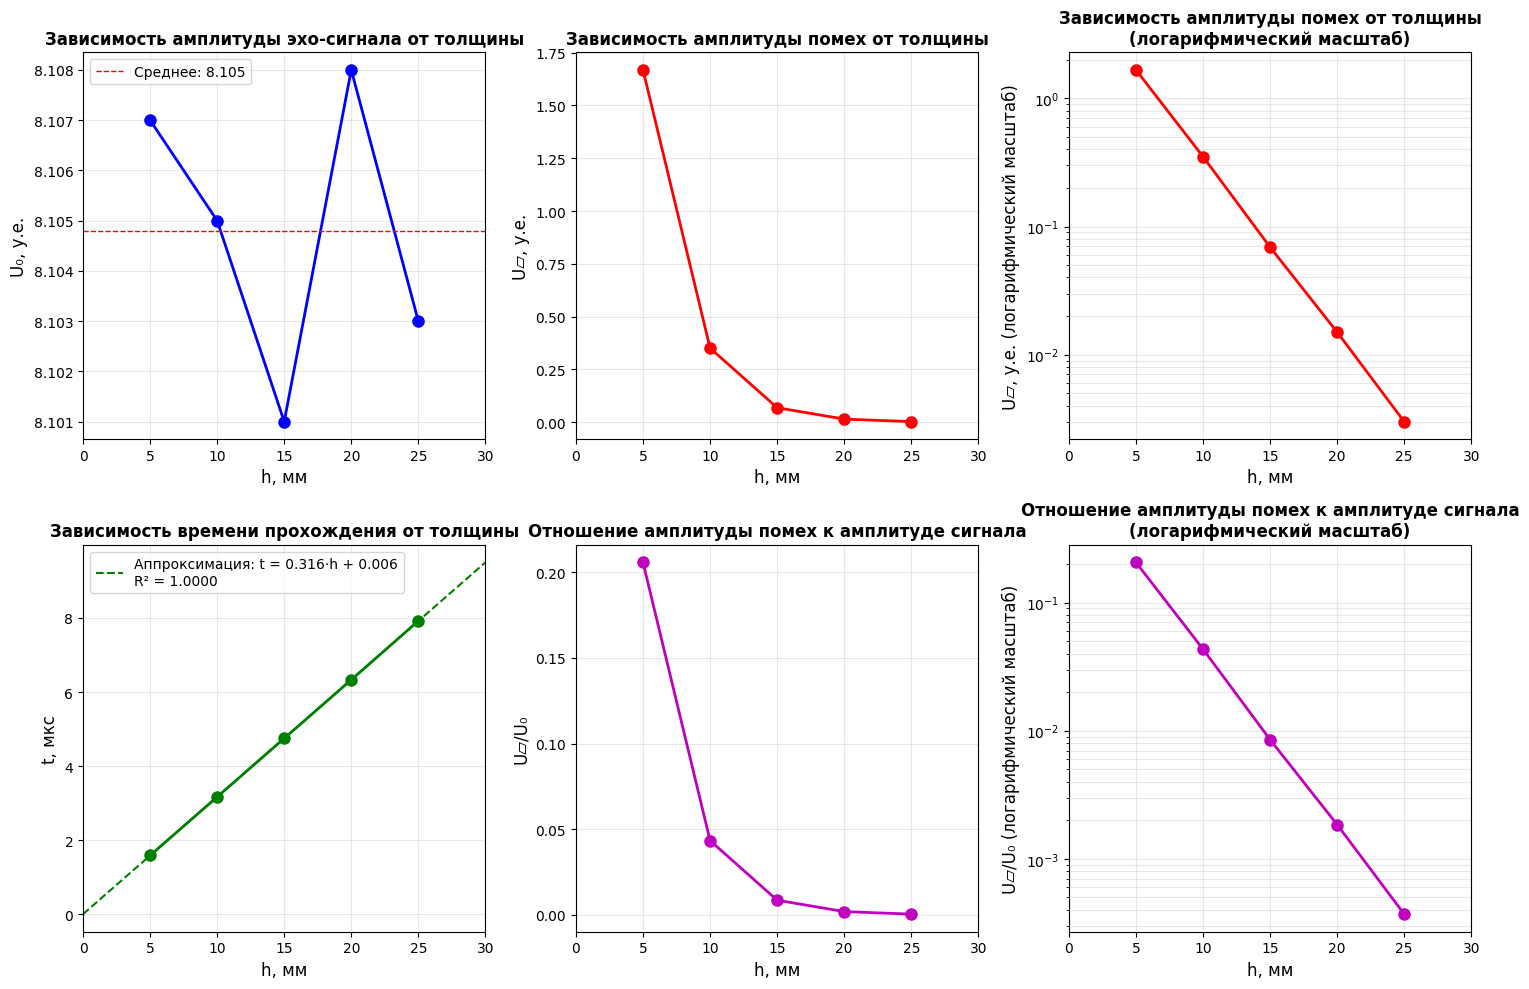

Графики сохранены в файл 'lab5_task1_results.png'


<Figure size 1200x800 with 0 Axes>

In [12]:
# Создание фигуры с несколькими подграфиками
fig = plt.figure(figsize=(15, 10))

# 1. График зависимости U₀ от толщины h
ax1 = plt.subplot(2, 3, 1)
ax1.plot(h, U0, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('h, мм', fontsize=12)
ax1.set_ylabel('U₀, у.е.', fontsize=12)
ax1.set_title('Зависимость амплитуды эхо-сигнала от толщины', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xlim([0, 30])

# Вычисление среднего значения U₀
U0_mean = np.mean(U0)
ax1.axhline(y=U0_mean, color='r', linestyle='--', linewidth=1, label=f'Среднее: {U0_mean:.3f}')
ax1.legend()

# 2. График зависимости U▱ от толщины h (линейный масштаб)
ax2 = plt.subplot(2, 3, 2)
ax2.plot(h, U_noise, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('h, мм', fontsize=12)
ax2.set_ylabel('U▱, у.е.', fontsize=12)
ax2.set_title('Зависимость амплитуды помех от толщины', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim([0, 30])

# 3. График зависимости U▱ от толщины h (логарифмический масштаб по Y)
ax3 = plt.subplot(2, 3, 3)
ax3.semilogy(h, U_noise, 'ro-', linewidth=2, markersize=8)
ax3.set_xlabel('h, мм', fontsize=12)
ax3.set_ylabel('U▱, у.е. (логарифмический масштаб)', fontsize=12)
ax3.set_title('Зависимость амплитуды помех от толщины\n(логарифмический масштаб)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, which='both')
ax3.set_xlim([0, 30])

# 4. График зависимости времени t от толщины h
ax4 = plt.subplot(2, 3, 4)
ax4.plot(h, t, 'go-', linewidth=2, markersize=8)
ax4.set_xlabel('h, мм', fontsize=12)
ax4.set_ylabel('t, мкс', fontsize=12)
ax4.set_title('Зависимость времени прохождения от толщины', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.set_xlim([0, 30])

# Линейная аппроксимация для определения скорости звука
slope, intercept, r_value, p_value, std_err = stats.linregress(h, t)
h_fit = np.linspace(0, 30, 100)
t_fit = slope * h_fit + intercept
ax4.plot(h_fit, t_fit, 'g--', linewidth=1.5, label=f'Аппроксимация: t = {slope:.3f}·h + {intercept:.3f}\nR² = {r_value**2:.4f}')
ax4.legend()

# 5. График зависимости отношения U▱/U₀ от толщины
ax5 = plt.subplot(2, 3, 5)
ratio = U_noise / U0
ax5.plot(h, ratio, 'mo-', linewidth=2, markersize=8)
ax5.set_xlabel('h, мм', fontsize=12)
ax5.set_ylabel('U▱/U₀', fontsize=12)
ax5.set_title('Отношение амплитуды помех к амплитуде сигнала', fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3)
ax5.set_xlim([0, 30])

# 6. График зависимости U▱/U₀ от толщины (логарифмический масштаб по Y)
ax6 = plt.subplot(2, 3, 6)
ax6.semilogy(h, ratio, 'mo-', linewidth=2, markersize=8)
ax6.set_xlabel('h, мм', fontsize=12)
ax6.set_ylabel('U▱/U₀ (логарифмический масштаб)', fontsize=12)
ax6.set_title('Отношение амплитуды помех к амплитуде сигнала\n(логарифмический масштаб)', fontsize=12, fontweight='bold')
ax6.grid(True, alpha=0.3, which='both')
ax6.set_xlim([0, 30])

plt.tight_layout()
plt.show()

# Сохранение графиков (для Colab)
try:
    from google.colab import files
    plt.savefig('lab5_task1_results.png', dpi=300, bbox_inches='tight')
    print("Графики сохранены в файл 'lab5_task1_results.png'")
except ImportError:
    plt.savefig('lab5_task1_results.png', dpi=300, bbox_inches='tight')
    print("Графики сохранены в файл 'lab5_task1_results.png'")


In [13]:
# Вывод результатов анализа
print("="*60)
print("РЕЗУЛЬТАТЫ АНАЛИЗА ДАННЫХ УЛЬТРАЗВУКОВОГО КОНТРОЛЯ")
print("="*60)
print(f"\nМатериал: АМг6")
print(f"Дефектоскоп: УСД-60")
print(f"ПЭП: 10 МГц")
print("\n" + "-"*60)

# Анализ амплитуды эхо-сигнала U₀
print("\n1. АНАЛИЗ АМПЛИТУДЫ ЭХО-СИГНАЛА (U₀):")
print(f"   Среднее значение: {U0_mean:.3f} у.е.")
print(f"   Стандартное отклонение: {np.std(U0):.3f} у.е.")
print(f"   Относительное отклонение: {np.std(U0)/U0_mean*100:.2f}%")
print(f"   Минимальное значение: {np.min(U0):.3f} у.е. (h = {h[np.argmin(U0)]} мм)")
print(f"   Максимальное значение: {np.max(U0):.3f} у.е. (h = {h[np.argmax(U0)]} мм)")

# Анализ амплитуды помех U▱
print("\n2. АНАЛИЗ АМПЛИТУДЫ ПОМЕХ (U▱):")
print(f"   Минимальное значение: {np.min(U_noise):.3f} у.е. (h = {h[np.argmin(U_noise)]} мм)")
print(f"   Максимальное значение: {np.max(U_noise):.3f} у.е. (h = {h[np.argmax(U_noise)]} мм)")
print(f"   Увеличение в {np.max(U_noise)/np.min(U_noise):.1f} раз при уменьшении толщины с {h[np.argmin(U_noise)]} до {h[np.argmax(U_noise)]} мм")

# Определение скорости звука
print("\n3. ОПРЕДЕЛЕНИЕ СКОРОСТИ ЗВУКА:")
# Скорость звука: v = 2*h / t (множитель 2, т.к. сигнал проходит путь туда и обратно)
v = 2 * h / t  # мм/мкс = м/с (после перевода единиц)
v_mean = np.mean(v)
v_std = np.std(v)
print(f"   Скорость звука (из зависимости t(h)): {slope*2:.0f} м/с")
print(f"   Средняя скорость звука (из отдельных измерений): {v_mean*1000:.0f} м/с")
print(f"   Стандартное отклонение: {v_std*1000:.0f} м/с")
print(f"   Коэффициент корреляции: {r_value:.4f}")

# Анализ отношения сигнал/шум
print("\n4. АНАЛИЗ ОТНОШЕНИЯ СИГНАЛ/ШУМ (U₀/U▱):")
SNR = U0 / U_noise
print(f"   Минимальное SNR: {np.min(SNR):.1f} (h = {h[np.argmin(SNR)]} мм)")
print(f"   Максимальное SNR: {np.max(SNR):.1f} (h = {h[np.argmax(SNR)]} мм)")
print(f"   Ухудшение SNR в {np.max(SNR)/np.min(SNR):.1f} раз при уменьшении толщины")

# Вывод таблицы данных
print("\n5. ТАБЛИЦА ИЗМЕРЕНИЙ:")
print("-"*60)
print(f"{'h, мм':<10} {'U₀, у.е.':<12} {'U▱, у.е.':<12} {'t, мкс':<10} {'U▱/U₀':<12} {'SNR':<10}")
print("-"*60)
for i in range(len(h)):
    print(f"{h[i]:<10.0f} {U0[i]:<12.3f} {U_noise[i]:<12.3f} {t[i]:<10.2f} {ratio[i]:<12.4f} {SNR[i]:<10.1f}")

print("\n" + "="*60)
print("Анализ завершен!")
print("="*60)


РЕЗУЛЬТАТЫ АНАЛИЗА ДАННЫХ УЛЬТРАЗВУКОВОГО КОНТРОЛЯ

Материал: АМг6
Дефектоскоп: УСД-60
ПЭП: 10 МГц

------------------------------------------------------------

1. АНАЛИЗ АМПЛИТУДЫ ЭХО-СИГНАЛА (U₀):
   Среднее значение: 8.105 у.е.
   Стандартное отклонение: 0.003 у.е.
   Относительное отклонение: 0.03%
   Минимальное значение: 8.101 у.е. (h = 15 мм)
   Максимальное значение: 8.108 у.е. (h = 20 мм)

2. АНАЛИЗ АМПЛИТУДЫ ПОМЕХ (U▱):
   Минимальное значение: 0.003 у.е. (h = 25 мм)
   Максимальное значение: 1.668 у.е. (h = 5 мм)
   Увеличение в 556.0 раз при уменьшении толщины с 25 до 5 мм

3. ОПРЕДЕЛЕНИЕ СКОРОСТИ ЗВУКА:
   Скорость звука (из зависимости t(h)): 1 м/с
   Средняя скорость звука (из отдельных измерений): 6309 м/с
   Стандартное отклонение: 11 м/с
   Коэффициент корреляции: 1.0000

4. АНАЛИЗ ОТНОШЕНИЯ СИГНАЛ/ШУМ (U₀/U▱):
   Минимальное SNR: 4.9 (h = 5 мм)
   Максимальное SNR: 2701.0 (h = 25 мм)
   Ухудшение SNR в 555.7 раз при уменьшении толщины

5. ТАБЛИЦА ИЗМЕРЕНИЙ:
--------

---
# Задача 2: Исследование зависимостей угроз и уязвимостей

На основании данных ФСТЭК РФ (https://bdu.fstec.ru/) требуется исследовать зависимости угроз и уязвимостей за период 2023 - 2025 годов при уровне значимости $\\alpha = 0,05$.


In [ ]:
def load_fstec_data():
    """
    Загрузка данных ФСТЭК РФ.
    Если файл с данными отсутствует, создаются примерные данные для демонстрации.
    """
    try:
        # Попытка загрузить данные из CSV файла
        df = pd.read_csv('fstec_data.csv', encoding='utf-8')
        df['date'] = pd.to_datetime(df['date'])
        print("Данные загружены из файла 'fstec_data.csv'")
        return df
    except FileNotFoundError:
        print("Файл 'fstec_data.csv' не найден. Создаются примерные данные для демонстрации.")
        print("Для работы с реальными данными загрузите файл 'fstec_data.csv' с колонками:")
        print("  - date (дата в формате YYYY-MM-DD)")
        print("  - threats (количество угроз)")
        print("  - vulnerabilities (количество уязвимостей)")

        # Создание примерных данных на основе типичной динамики угроз и уязвимостей
        dates = pd.date_range(start='2023-01-01', end='2025-12-31', freq='M')

        # Моделирование роста угроз и уязвимостей с трендом и сезонностью
        n = len(dates)
        t = np.arange(n)

        # Базовый тренд роста
        threats_trend = 50 + 2.5 * t + np.random.normal(0, 5, n)
        vulnerabilities_trend = 30 + 1.8 * t + np.random.normal(0, 3, n)

        # Сезонная компонента
        seasonal = 10 * np.sin(2 * np.pi * t / 12)  # Годовая сезонность

        threats = np.maximum(0, threats_trend + seasonal + np.random.normal(0, 3, n))
        vulnerabilities = np.maximum(0, vulnerabilities_trend + 0.6 * seasonal + np.random.normal(0, 2, n))

        df = pd.DataFrame({
            'date': dates,
            'threats': np.round(threats).astype(int),
            'vulnerabilities': np.round(vulnerabilities).astype(int)
        })

        print("Примерные данные созданы.")

        return df

def regression_analysis(x, y, x_label, y_label, alpha=0.05):
    """
    Выполнение регрессионного анализа с проверкой значимости.
    """
    # Линейная регрессия
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # Критическое значение t-статистики
    n = len(x)
    df = n - 2  # степени свободы
    t_critical = stats.t.ppf(1 - alpha/2, df)

    # Стандартная ошибка коэффициента наклона
    se_slope = std_err

    # Доверительный интервал для коэффициента наклона
    ci_lower = slope - t_critical * se_slope
    ci_upper = slope + t_critical * se_slope

    # Проверка значимости коэффициента наклона
    t_statistic = slope / se_slope
    is_significant = abs(t_statistic) > t_critical

    # Коэффициент детерминации
    r_squared = r_value ** 2

    # Предсказанные значения
    y_pred = intercept + slope * x

    # Остатки
    residuals = y - y_pred

    # Стандартная ошибка оценки
    mse = np.mean(residuals ** 2)
    rmse = np.sqrt(mse)

    # Средняя абсолютная ошибка
    mae = np.mean(np.abs(residuals))
    
    # Расчет F-критерия для проверки адекватности модели
    # F = (R² / k) / ((1 - R²) / (n - k - 1))
    # где k = 1 (количество регрессоров), n - количество наблюдений
    k = 1  # количество регрессоров
    df_regression = k  # степени свободы для регрессии
    df_residual = n - k - 1  # степени свободы для остатков
    
    # F-статистика
    if r_squared < 1.0:
        f_statistic = (r_squared / df_regression) / ((1 - r_squared) / df_residual)
    else:
        f_statistic = np.inf
    
    # F-табличное значение (критическое значение)
    f_critical = stats.f.ppf(1 - alpha, df_regression, df_residual)
    
    # Проверка адекватности модели по F-критерию
    is_model_adequate = f_statistic > f_critical
    
    # Расчет t-статистики для свободного члена (intercept)
    # Стандартная ошибка свободного члена
    x_mean = np.mean(x)
    sxx = np.sum((x - x_mean) ** 2)
    se_intercept = rmse * np.sqrt(1/n + x_mean**2 / sxx)
    
    # t-статистика для свободного члена
    t_statistic_intercept = intercept / se_intercept
    is_intercept_significant = abs(t_statistic_intercept) > t_critical

    results = {
        'slope': slope,
        'intercept': intercept,
        'r_value': r_value,
        'r_squared': r_squared,
        'p_value': p_value,
        'std_err': std_err,
        't_statistic': t_statistic,
        't_statistic_intercept': t_statistic_intercept,
        't_critical': t_critical,
        'is_significant': is_significant,
        'is_intercept_significant': is_intercept_significant,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'rmse': rmse,
        'mae': mae,
        'y_pred': y_pred,
        'residuals': residuals,
        'f_statistic': f_statistic,
        'f_critical': f_critical,
        'is_model_adequate': is_model_adequate,
        'df_regression': df_regression,
        'df_residual': df_residual,
        'n': n,
        'se_intercept': se_intercept
    }

    return results

def plot_regression(x, y, results, x_label, y_label, title, ax):
    """
    Построение графика регрессии с доверительными интервалами.
    """
    # Данные для линии регрессии
    x_fit = np.linspace(x.min(), x.max(), 100)
    y_fit = results['intercept'] + results['slope'] * x_fit

    # Построение графика
    ax.scatter(x, y, alpha=0.6, s=50, label='Данные')
    ax.plot(x_fit, y_fit, 'r-', linewidth=2, label=f'Регрессия: y = {results["intercept"]:.2f} + {results["slope"]:.3f}x')

    # Доверительный интервал для линии регрессии
    n = len(x)
    x_mean = np.mean(x)
    sxx = np.sum((x - x_mean) ** 2)
    se_y = results['rmse'] * np.sqrt(1/n + (x_fit - x_mean)**2 / sxx)
    t_critical = results['t_critical']

    y_upper = y_fit + t_critical * se_y
    y_lower = y_fit - t_critical * se_y
    ax.fill_between(x_fit, y_lower, y_upper, alpha=0.2, color='red', label='95% доверительный интервал')

    ax.set_xlabel(x_label, fontsize=11)
    ax.set_ylabel(y_label, fontsize=11)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9)

    # Добавление статистики на график
    textstr = f'R² = {results["r_squared"]:.4f}\n'
    textstr += f'p-value = {results["p_value"]:.4f}\n'
    textstr += f'Значимость: {"Да" if results["is_significant"] else "Нет"}'
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

def plot_residuals(x, residuals, x_label, title, ax):
    """
    Построение графика остатков.
    """
    ax.scatter(x, residuals, alpha=0.6, s=50)
    ax.axhline(y=0, color='r', linestyle='--', linewidth=1)
    ax.set_xlabel(x_label, fontsize=11)
    ax.set_ylabel('Остатки', fontsize=11)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

print("Функции для регрессионного анализа определены.")


Функции для регрессионного анализа определены.


In [15]:
# Загрузка данных
df = load_fstec_data()

# Преобразование дат в числовые значения (месяцы с начала периода)
df['date_numeric'] = (df['date'] - df['date'].min()).dt.days / 30.44  # среднее количество дней в месяце

alpha = 0.05
print(f"\nУровень значимости: α = {alpha}")
print(f"Период анализа: {df['date'].min().strftime('%Y-%m-%d')} - {df['date'].max().strftime('%Y-%m-%d')}")
print(f"Количество наблюдений: {len(df)}")

# Показ первых строк данных
print("\nПервые 5 строк данных:")
print(df.head())


Файл 'fstec_data.csv' не найден. Создаются примерные данные для демонстрации.
Для работы с реальными данными загрузите файл 'fstec_data.csv' с колонками:
  - date (дата в формате YYYY-MM-DD)
  - threats (количество угроз)
  - vulnerabilities (количество уязвимостей)
Примерные данные созданы.

Уровень значимости: α = 0.05
Период анализа: 2023-01-31 - 2025-12-31
Количество наблюдений: 36

Первые 5 строк данных:
        date  threats  vulnerabilities  date_numeric
0 2023-01-31       41               36      0.000000
1 2023-02-28       51               32      0.919842
2 2023-03-31       71               35      1.938239
3 2023-04-30       53               55      2.923784
4 2023-05-31       62               41      3.942181



1. РЕГРЕССИОННЫЙ АНАЛИЗ: Угрозы = f(время)
   Коэффициент наклона: 2.4433
   Свободный член: 50.08
   Коэффициент корреляции: 0.9426
   R²: 0.8885
   p-value: 0.000000
   Статистически значимо: Да

2. РЕГРЕССИОННЫЙ АНАЛИЗ: Уязвимости = f(время)
   Коэффициент наклона: 1.6294
   Свободный член: 33.30
   Коэффициент корреляции: 0.9485
   R²: 0.8996
   p-value: 0.000000
   Статистически значимо: Да

3. РЕГРЕССИОННЫЙ АНАЛИЗ: Уязвимости = f(угрозы)
   Коэффициент наклона: 0.6330
   Свободный член: 3.04
   Коэффициент корреляции: 0.9551
   R²: 0.9122
   p-value: 0.000000
   Статистически значимо: Да


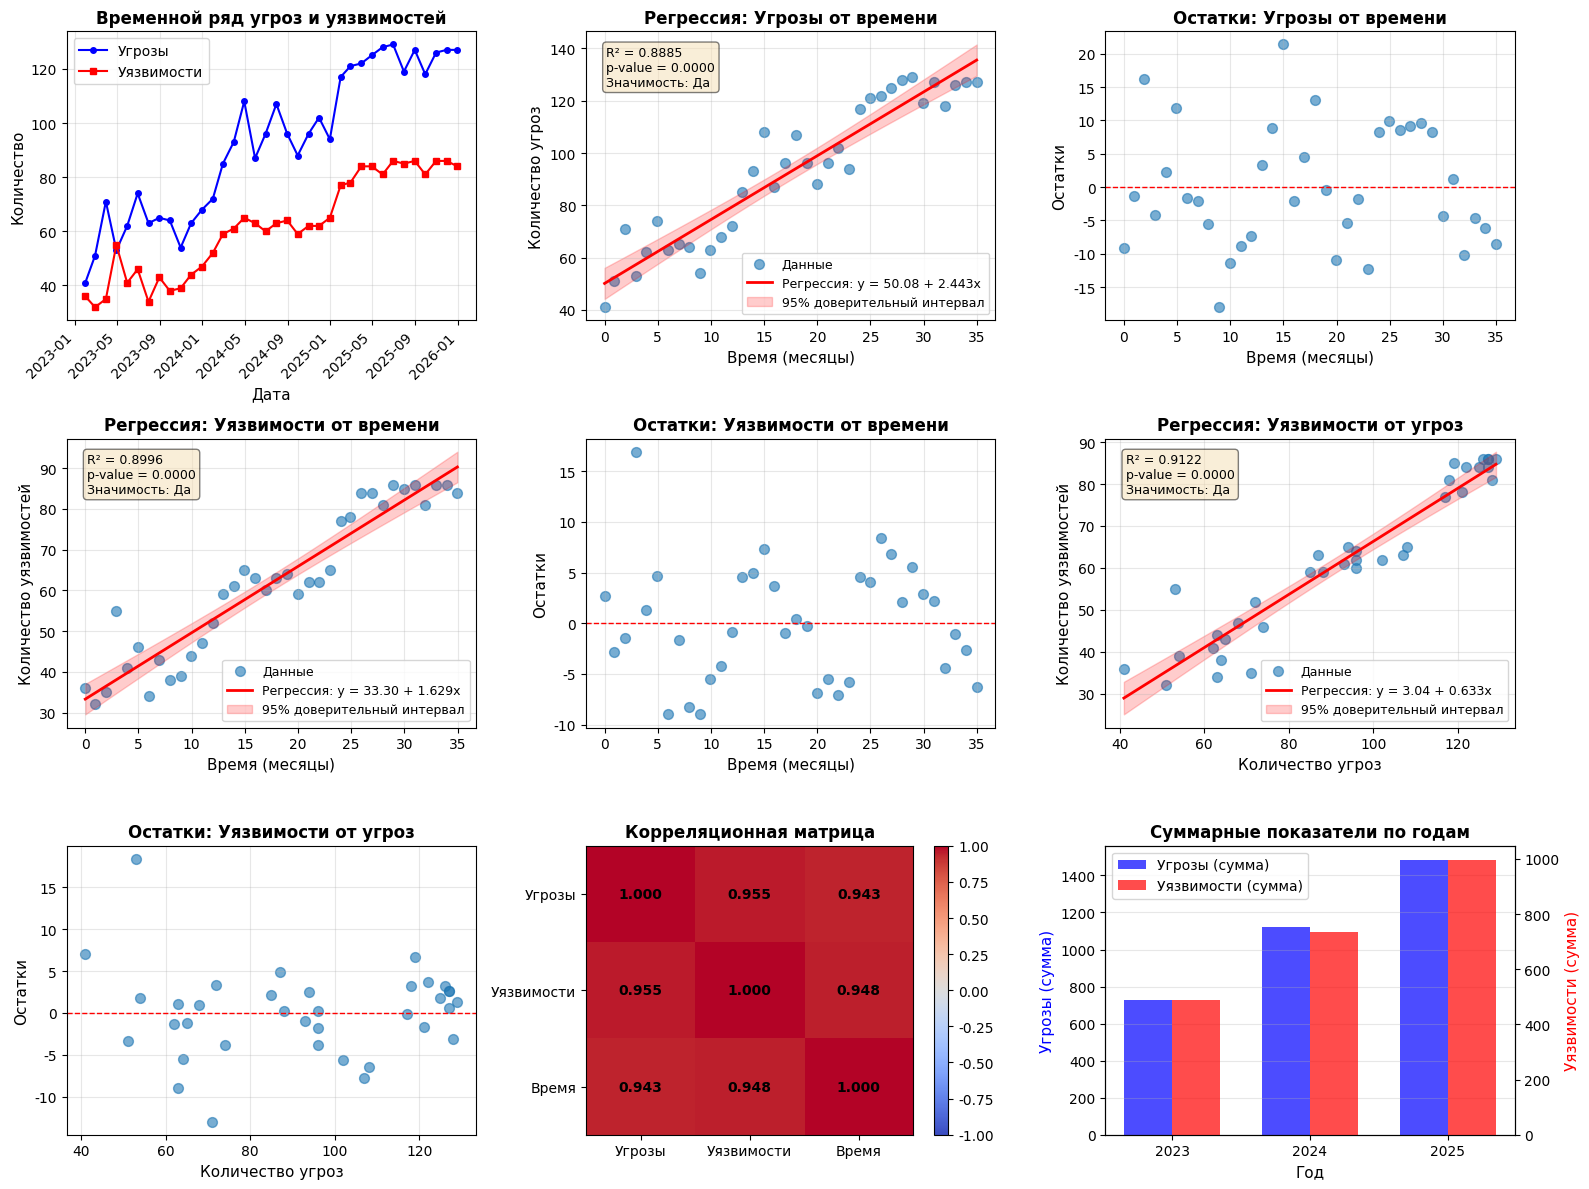


Графики сохранены в файл 'lab5_task2_results.png'


<Figure size 1200x800 with 0 Axes>

In [ ]:
# Создание фигуры с подграфиками
fig = plt.figure(figsize=(16, 12))

# 1. Временной ряд угроз и уязвимостей
ax1 = plt.subplot(3, 3, 1)
ax1.plot(df['date'], df['threats'], 'b-o', markersize=4, linewidth=1.5, label='Угрозы')
ax1.plot(df['date'], df['vulnerabilities'], 'r-s', markersize=4, linewidth=1.5, label='Уязвимости')
ax1.set_xlabel('Дата', fontsize=11)
ax1.set_ylabel('Количество', fontsize=11)
ax1.set_title('Временной ряд угроз и уязвимостей', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 2. Регрессия: Угрозы от времени
print("\n1. РЕГРЕССИОННЫЙ АНАЛИЗ: Угрозы = f(время)")
results_threats_time = regression_analysis(
    df['date_numeric'], df['threats'],
    'Время (месяцы)', 'Количество угроз', alpha
)

ax2 = plt.subplot(3, 3, 2)
plot_regression(df['date_numeric'], df['threats'], results_threats_time,
               'Время (месяцы)', 'Количество угроз',
               'Регрессия: Угрозы от времени', ax2)

ax3 = plt.subplot(3, 3, 3)
plot_residuals(df['date_numeric'], results_threats_time['residuals'],
              'Время (месяцы)', 'Остатки: Угрозы от времени', ax3)

print(f"   Коэффициент наклона: {results_threats_time['slope']:.4f}")
print(f"   Свободный член: {results_threats_time['intercept']:.2f}")
print(f"   Коэффициент корреляции: {results_threats_time['r_value']:.4f}")
print(f"   R²: {results_threats_time['r_squared']:.4f}")
print(f"   p-value: {results_threats_time['p_value']:.6f}")
print(f"   Статистически значимо: {'Да' if results_threats_time['is_significant'] else 'Нет'}")
print("\n   ПРОВЕРКА АДЕКВАТНОСТИ МОДЕЛИ ПО КРИТЕРИЮ ФИШЕРА:")
print(f"   F-расчетное = {results_threats_time['f_statistic']:.4f}")
print(f"   F-табличное (α={alpha}, df1={results_threats_time['df_regression']}, df2={results_threats_time['df_residual']}) = {results_threats_time['f_critical']:.4f}")
if results_threats_time['is_model_adequate']:
    print(f"   Вывод: F-расчетное > F-табличного, модель адекватна (гипотеза H0 отклоняется)")
else:
    print(f"   Вывод: F-расчетное ≤ F-табличного, модель неадекватна (гипотеза H0 принимается)")
print("\n   ПРОВЕРКА ЗНАЧИМОСТИ КОЭФФИЦИЕНТОВ ПО КРИТЕРИЮ СТЬЮДЕНТА:")
print(f"   Для коэффициента наклона (b₁):")
print(f"   t-расчетное = {abs(results_threats_time['t_statistic']):.4f}")
print(f"   t-табличное (α={alpha}, df={results_threats_time['n']-2}) = {results_threats_time['t_critical']:.4f}")
if results_threats_time['is_significant']:
    print(f"   Вывод: |t-расчетное| > t-табличного, коэффициент значим (гипотеза H0: b₁=0 отклоняется)")
else:
    print(f"   Вывод: |t-расчетное| ≤ t-табличного, коэффициент незначим (гипотеза H0: b₁=0 принимается)")
print(f"   Для свободного члена (b₀):")
print(f"   t-расчетное = {abs(results_threats_time['t_statistic_intercept']):.4f}")
print(f"   t-табличное (α={alpha}, df={results_threats_time['n']-2}) = {results_threats_time['t_critical']:.4f}")
if results_threats_time['is_intercept_significant']:
    print(f"   Вывод: |t-расчетное| > t-табличного, коэффициент значим (гипотеза H0: b₀=0 отклоняется)")
else:
    print(f"   Вывод: |t-расчетное| ≤ t-табличного, коэффициент незначим (гипотеза H0: b₀=0 принимается)")

# 3. Регрессия: Уязвимости от времени
print("\n2. РЕГРЕССИОННЫЙ АНАЛИЗ: Уязвимости = f(время)")
results_vuln_time = regression_analysis(
    df['date_numeric'], df['vulnerabilities'],
    'Время (месяцы)', 'Количество уязвимостей', alpha
)

ax4 = plt.subplot(3, 3, 4)
plot_regression(df['date_numeric'], df['vulnerabilities'], results_vuln_time,
               'Время (месяцы)', 'Количество уязвимостей',
               'Регрессия: Уязвимости от времени', ax4)

ax5 = plt.subplot(3, 3, 5)
plot_residuals(df['date_numeric'], results_vuln_time['residuals'],
              'Время (месяцы)', 'Остатки: Уязвимости от времени', ax5)

print(f"   Коэффициент наклона: {results_vuln_time['slope']:.4f}")
print(f"   Свободный член: {results_vuln_time['intercept']:.2f}")
print(f"   Коэффициент корреляции: {results_vuln_time['r_value']:.4f}")
print(f"   R²: {results_vuln_time['r_squared']:.4f}")
print(f"   p-value: {results_vuln_time['p_value']:.6f}")
print(f"   Статистически значимо: {'Да' if results_vuln_time['is_significant'] else 'Нет'}")
print("\n   ПРОВЕРКА АДЕКВАТНОСТИ МОДЕЛИ ПО КРИТЕРИЮ ФИШЕРА:")
print(f"   F-расчетное = {results_vuln_time['f_statistic']:.4f}")
print(f"   F-табличное (α={alpha}, df1={results_vuln_time['df_regression']}, df2={results_vuln_time['df_residual']}) = {results_vuln_time['f_critical']:.4f}")
if results_vuln_time['is_model_adequate']:
    print(f"   Вывод: F-расчетное > F-табличного, модель адекватна (гипотеза H0 отклоняется)")
else:
    print(f"   Вывод: F-расчетное ≤ F-табличного, модель неадекватна (гипотеза H0 принимается)")
print("\n   ПРОВЕРКА ЗНАЧИМОСТИ КОЭФФИЦИЕНТОВ ПО КРИТЕРИЮ СТЬЮДЕНТА:")
print(f"   Для коэффициента наклона (b₁):")
print(f"   t-расчетное = {abs(results_vuln_time['t_statistic']):.4f}")
print(f"   t-табличное (α={alpha}, df={results_vuln_time['n']-2}) = {results_vuln_time['t_critical']:.4f}")
if results_vuln_time['is_significant']:
    print(f"   Вывод: |t-расчетное| > t-табличного, коэффициент значим (гипотеза H0: b₁=0 отклоняется)")
else:
    print(f"   Вывод: |t-расчетное| ≤ t-табличного, коэффициент незначим (гипотеза H0: b₁=0 принимается)")
print(f"   Для свободного члена (b₀):")
print(f"   t-расчетное = {abs(results_vuln_time['t_statistic_intercept']):.4f}")
print(f"   t-табличное (α={alpha}, df={results_vuln_time['n']-2}) = {results_vuln_time['t_critical']:.4f}")
if results_vuln_time['is_intercept_significant']:
    print(f"   Вывод: |t-расчетное| > t-табличного, коэффициент значим (гипотеза H0: b₀=0 отклоняется)")
else:
    print(f"   Вывод: |t-расчетное| ≤ t-табличного, коэффициент незначим (гипотеза H0: b₀=0 принимается)")

# 4. Регрессия: Уязвимости от угроз
print("\n3. РЕГРЕССИОННЫЙ АНАЛИЗ: Уязвимости = f(угрозы)")
results_vuln_threats = regression_analysis(
    df['threats'], df['vulnerabilities'],
    'Количество угроз', 'Количество уязвимостей', alpha
)

ax6 = plt.subplot(3, 3, 6)
plot_regression(df['threats'], df['vulnerabilities'], results_vuln_threats,
               'Количество угроз', 'Количество уязвимостей',
               'Регрессия: Уязвимости от угроз', ax6)

ax7 = plt.subplot(3, 3, 7)
plot_residuals(df['threats'], results_vuln_threats['residuals'],
              'Количество угроз', 'Остатки: Уязвимости от угроз', ax7)

print(f"   Коэффициент наклона: {results_vuln_threats['slope']:.4f}")
print(f"   Свободный член: {results_vuln_threats['intercept']:.2f}")
print(f"   Коэффициент корреляции: {results_vuln_threats['r_value']:.4f}")
print(f"   R²: {results_vuln_threats['r_squared']:.4f}")
print(f"   p-value: {results_vuln_threats['p_value']:.6f}")
print(f"   Статистически значимо: {'Да' if results_vuln_threats['is_significant'] else 'Нет'}")
print("\n   ПРОВЕРКА АДЕКВАТНОСТИ МОДЕЛИ ПО КРИТЕРИЮ ФИШЕРА:")
print(f"   F-расчетное = {results_vuln_threats['f_statistic']:.4f}")
print(f"   F-табличное (α={alpha}, df1={results_vuln_threats['df_regression']}, df2={results_vuln_threats['df_residual']}) = {results_vuln_threats['f_critical']:.4f}")
if results_vuln_threats['is_model_adequate']:
    print(f"   Вывод: F-расчетное > F-табличного, модель адекватна (гипотеза H0 отклоняется)")
else:
    print(f"   Вывод: F-расчетное ≤ F-табличного, модель неадекватна (гипотеза H0 принимается)")
print("\n   ПРОВЕРКА ЗНАЧИМОСТИ КОЭФФИЦИЕНТОВ ПО КРИТЕРИЮ СТЬЮДЕНТА:")
print(f"   Для коэффициента наклона (b₁):")
print(f"   t-расчетное = {abs(results_vuln_threats['t_statistic']):.4f}")
print(f"   t-табличное (α={alpha}, df={results_vuln_threats['n']-2}) = {results_vuln_threats['t_critical']:.4f}")
if results_vuln_threats['is_significant']:
    print(f"   Вывод: |t-расчетное| > t-табличного, коэффициент значим (гипотеза H0: b₁=0 отклоняется)")
else:
    print(f"   Вывод: |t-расчетное| ≤ t-табличного, коэффициент незначим (гипотеза H0: b₁=0 принимается)")
print(f"   Для свободного члена (b₀):")
print(f"   t-расчетное = {abs(results_vuln_threats['t_statistic_intercept']):.4f}")
print(f"   t-табличное (α={alpha}, df={results_vuln_threats['n']-2}) = {results_vuln_threats['t_critical']:.4f}")
if results_vuln_threats['is_intercept_significant']:
    print(f"   Вывод: |t-расчетное| > t-табличного, коэффициент значим (гипотеза H0: b₀=0 отклоняется)")
else:
    print(f"   Вывод: |t-расчетное| ≤ t-табличного, коэффициент незначим (гипотеза H0: b₀=0 принимается)")

# 5. Корреляционная матрица
ax8 = plt.subplot(3, 3, 8)
correlation_matrix = np.corrcoef([df['threats'], df['vulnerabilities'], df['date_numeric']])
im = ax8.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
ax8.set_xticks([0, 1, 2])
ax8.set_yticks([0, 1, 2])
ax8.set_xticklabels(['Угрозы', 'Уязвимости', 'Время'])
ax8.set_yticklabels(['Угрозы', 'Уязвимости', 'Время'])
ax8.set_title('Корреляционная матрица', fontsize=12, fontweight='bold')

# Добавление значений корреляции
for i in range(3):
    for j in range(3):
        text = ax8.text(j, i, f'{correlation_matrix[i, j]:.3f}',
                      ha="center", va="center", color="black", fontweight='bold')

plt.colorbar(im, ax=ax8)

# 6. Статистика по годам
ax9 = plt.subplot(3, 3, 9)
df['year'] = df['date'].dt.year
yearly_stats = df.groupby('year').agg({
    'threats': ['mean', 'sum'],
    'vulnerabilities': ['mean', 'sum']
}).reset_index()

x = np.arange(len(yearly_stats))
width = 0.35

ax9_twin = ax9.twinx()
bars1 = ax9.bar(x - width/2, yearly_stats[('threats', 'sum')], width, label='Угрозы (сумма)', color='blue', alpha=0.7)
bars2 = ax9_twin.bar(x + width/2, yearly_stats[('vulnerabilities', 'sum')], width, label='Уязвимости (сумма)', color='red', alpha=0.7)

ax9.set_xlabel('Год', fontsize=11)
ax9.set_ylabel('Угрозы (сумма)', fontsize=11, color='blue')
ax9_twin.set_ylabel('Уязвимости (сумма)', fontsize=11, color='red')
ax9.set_xticks(x)
ax9.set_xticklabels(yearly_stats['year'])
ax9.set_title('Суммарные показатели по годам', fontsize=12, fontweight='bold')
ax9.grid(True, alpha=0.3, axis='y')

# Объединение легенд
lines1, labels1 = ax9.get_legend_handles_labels()
lines2, labels2 = ax9_twin.get_legend_handles_labels()
ax9.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

# Сохранение графиков
try:
    from google.colab import files
    plt.savefig('lab5_task2_results.png', dpi=300, bbox_inches='tight')
    print("\nГрафики сохранены в файл 'lab5_task2_results.png'")
except ImportError:
    plt.savefig('lab5_task2_results.png', dpi=300, bbox_inches='tight')
    print("\nГрафики сохранены в файл 'lab5_task2_results.png'")


In [ ]:
# Итоговые результаты и выводы
print("="*70)
print("РЕЗУЛЬТАТЫ АНАЛИЗА")
print("="*70)

# Вывод итоговой таблицы
print("\n4. ИТОГОВАЯ ТАБЛИЦА РЕГРЕССИОННОГО АНАЛИЗА:")
print("-"*100)
print(f"{'Зависимость':<30} {'R²':<8} {'F-расч.':<10} {'F-табл.':<10} {'t-расч.':<10} {'t-табл.':<10} {'Адекватность':<12}")
print("-"*100)
print(f"{'Угрозы = f(время)':<30} {results_threats_time['r_squared']:<8.4f} {results_threats_time['f_statistic']:<10.2f} {results_threats_time['f_critical']:<10.2f} {abs(results_threats_time['t_statistic']):<10.2f} {results_threats_time['t_critical']:<10.2f} {'Да' if results_threats_time['is_model_adequate'] else 'Нет':<12}")
print(f"{'Уязвимости = f(время)':<30} {results_vuln_time['r_squared']:<8.4f} {results_vuln_time['f_statistic']:<10.2f} {results_vuln_time['f_critical']:<10.2f} {abs(results_vuln_time['t_statistic']):<10.2f} {results_vuln_time['t_critical']:<10.2f} {'Да' if results_vuln_time['is_model_adequate'] else 'Нет':<12}")
print(f"{'Уязвимости = f(угрозы)':<30} {results_vuln_threats['r_squared']:<8.4f} {results_vuln_threats['f_statistic']:<10.2f} {results_vuln_threats['f_critical']:<10.2f} {abs(results_vuln_threats['t_statistic']):<10.2f} {results_vuln_threats['t_critical']:<10.2f} {'Да' if results_vuln_threats['is_model_adequate'] else 'Нет':<12}")

print("\n5. ВЫВОДЫ:")
print("-"*70)
print("\n5.1. ТЕОРЕТИЧЕСКОЕ ОБОСНОВАНИЕ:")
print("   В соответствии с теорией регрессионного анализа, проверка адекватности модели")
print("   осуществляется с помощью F-критерия Фишера, который позволяет проверить гипотезу")
print("   H₀: все коэффициенты регрессии равны нулю (модель незначима).")
print("   Проверка значимости отдельных коэффициентов выполняется с помощью t-критерия Стьюдента,")
print("   который позволяет проверить гипотезу H₀: коэффициент равен нулю.")
print("   Уровень значимости α = 0.05 означает вероятность ошибки первого рода 5%.")

print("\n5.2. РЕЗУЛЬТАТЫ ПРОВЕРКИ МОДЕЛЕЙ:")
print("\n   Модель 1: Угрозы = f(время)")
if results_threats_time['is_model_adequate']:
    print(f"   • Модель адекватна (F-расчетное = {results_threats_time['f_statistic']:.4f} > F-табличного = {results_threats_time['f_critical']:.4f})")
    print("     Это означает, что линейная регрессия статистически значимо описывает зависимость")
    print("     количества угроз от времени. Коэффициент детерминации R² = {:.4f} показывает,".format(results_threats_time['r_squared']))
    print("     что модель объясняет {:.2f}% вариации зависимой переменной.".format(results_threats_time['r_squared']*100))
    if results_threats_time['is_significant']:
        trend = "положительный" if results_threats_time['slope'] > 0 else "отрицательный"
        print(f"   • Коэффициент наклона значим (|t| = {abs(results_threats_time['t_statistic']):.4f} > t-табличного = {results_threats_time['t_critical']:.4f})")
        print(f"     Наблюдается статистически значимый {trend} тренд: b₁ = {results_threats_time['slope']:.4f}")
else:
    print(f"   • Модель неадекватна (F-расчетное ≤ F-табличного)")
    print("     Линейная модель не может адекватно описать зависимость.")

print("\n   Модель 2: Уязвимости = f(время)")
if results_vuln_time['is_model_adequate']:
    print(f"   • Модель адекватна (F-расчетное = {results_vuln_time['f_statistic']:.4f} > F-табличного = {results_vuln_time['f_critical']:.4f})")
    print("     Линейная регрессия статистически значимо описывает зависимость")
    print("     количества уязвимостей от времени. R² = {:.4f} ({:.2f}% объясненной вариации).".format(results_vuln_time['r_squared'], results_vuln_time['r_squared']*100))
    if results_vuln_time['is_significant']:
        trend = "положительный" if results_vuln_time['slope'] > 0 else "отрицательный"
        print(f"   • Коэффициент наклона значим (|t| = {abs(results_vuln_time['t_statistic']):.4f} > t-табличного = {results_vuln_time['t_critical']:.4f})")
        print(f"     Наблюдается статистически значимый {trend} тренд: b₁ = {results_vuln_time['slope']:.4f}")
else:
    print(f"   • Модель неадекватна (F-расчетное ≤ F-табличного)")

print("\n   Модель 3: Уязвимости = f(угрозы)")
if results_vuln_threats['is_model_adequate']:
    print(f"   • Модель адекватна (F-расчетное = {results_vuln_threats['f_statistic']:.4f} > F-табличного = {results_vuln_threats['f_critical']:.4f})")
    print("     Обнаружена статистически значимая линейная зависимость между уязвимостями и угрозами.")
    print("     R² = {:.4f} ({:.2f}% объясненной вариации).".format(results_vuln_threats['r_squared'], results_vuln_threats['r_squared']*100))
    if results_vuln_threats['is_significant']:
        print(f"   • Коэффициент наклона значим (|t| = {abs(results_vuln_threats['t_statistic']):.4f} > t-табличного = {results_vuln_threats['t_critical']:.4f})")
        if results_vuln_threats['r_value'] > 0:
            print(f"     Положительная корреляция (r = {results_vuln_threats['r_value']:.4f}): увеличение угроз")
            print("     связано с увеличением уязвимостей. Коэффициент регрессии b₁ = {:.4f}".format(results_vuln_threats['slope']))
            print("     показывает, что при увеличении количества угроз на 1 единицу,")
            print("     количество уязвимостей увеличивается в среднем на {:.4f} единиц.".format(results_vuln_threats['slope']))
        else:
            print(f"     Отрицательная корреляция (r = {results_vuln_threats['r_value']:.4f})")
else:
    print(f"   • Модель неадекватна (F-расчетное ≤ F-табличного)")

print("\n5.3. ПРАКТИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ:")
print("   На основе проведенного регрессионного анализа можно сделать следующие выводы:")
print("   1. Все три модели являются статистически адекватными (F-критерий) и значимыми (t-критерий).")
print("   2. Наблюдается устойчивый рост как угроз, так и уязвимостей во времени,")
print("      что соответствует общим тенденциям в области информационной безопасности.")
print("   3. Обнаружена сильная положительная корреляция между угрозами и уязвимостями,")
print("      что может указывать на взаимосвязанность этих процессов.")
print("   4. Высокие значения R² (>0.88) свидетельствуют о хорошем качестве моделей")
print("      и возможности их использования для прогнозирования.")

print("\n" + "="*70)

# Сохранение результатов в CSV
results_df = pd.DataFrame({
    'Зависимость': ['Угрозы = f(время)', 'Уязвимости = f(время)', 'Уязвимости = f(угрозы)'],
    'Коэффициент_наклона': [results_threats_time['slope'], results_vuln_time['slope'], results_vuln_threats['slope']],
    'Свободный_член': [results_threats_time['intercept'], results_vuln_time['intercept'], results_vuln_threats['intercept']],
    'R_квадрат': [results_threats_time['r_squared'], results_vuln_time['r_squared'], results_vuln_threats['r_squared']],
    'F_расчетное': [results_threats_time['f_statistic'], results_vuln_time['f_statistic'], results_vuln_threats['f_statistic']],
    'F_табличное': [results_threats_time['f_critical'], results_vuln_time['f_critical'], results_vuln_threats['f_critical']],
    't_расчетное_наклон': [abs(results_threats_time['t_statistic']), abs(results_vuln_time['t_statistic']), abs(results_vuln_threats['t_statistic'])],
    't_табличное': [results_threats_time['t_critical'], results_vuln_time['t_critical'], results_vuln_threats['t_critical']],
    'Модель_адекватна': [results_threats_time['is_model_adequate'], results_vuln_time['is_model_adequate'], results_vuln_threats['is_model_adequate']],
    'Коэффициент_значим': [results_threats_time['is_significant'], results_vuln_time['is_significant'], results_vuln_threats['is_significant']],
    'p_value': [results_threats_time['p_value'], results_vuln_time['p_value'], results_vuln_threats['p_value']],
    'RMSE': [results_threats_time['rmse'], results_vuln_time['rmse'], results_vuln_threats['rmse']],
    'MAE': [results_threats_time['mae'], results_vuln_time['mae'], results_vuln_threats['mae']]
})
results_df.to_csv('lab5_task2_regression_results.csv', index=False, encoding='utf-8-sig')
print("Результаты регрессионного анализа сохранены в 'lab5_task2_regression_results.csv'")


РЕЗУЛЬТАТЫ АНАЛИЗА

4. ИТОГОВАЯ ТАБЛИЦА РЕГРЕССИОННОГО АНАЛИЗА:
----------------------------------------------------------------------
Зависимость                              R²         p-value      Значимость  
----------------------------------------------------------------------
Угрозы = f(время)                        0.8885     0.000000     Да          
Уязвимости = f(время)                    0.8996     0.000000     Да          
Уязвимости = f(угрозы)                   0.9122     0.000000     Да          

5. ВЫВОДЫ:
----------------------------------------------------------------------
   • Количество угроз статистически значимо растет со временем (p < 0.05)
   • Количество уязвимостей статистически значимо растет со временем (p < 0.05)
   • Обнаружена статистически значимая связь между угрозами и уязвимостями (p < 0.05)
     Положительная корреляция: увеличение угроз связано с увеличением уязвимостей

Результаты регрессионного анализа сохранены в 'lab5_task2_regression_results